In [1]:
import pandas as pd
import pydotplus as py
import matplotlib.pyplot as plt
import numpy as np


In [3]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_csv('data/plant.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [7]:
#describing the dataset
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [11]:
num_classes = df['PE'].nunique() 
print(num_classes)
class_frequencies = df['PE'].value_counts()
print(class_frequencies)

4836
PE
468.80    9
434.01    8
447.06    8
442.78    8
440.26    7
         ..
476.09    1
431.25    1
486.36    1
439.44    1
432.90    1
Name: count, Length: 4836, dtype: int64


In [13]:
for class_name, frequency in class_frequencies.items():
    print(f"Class: {class_name}, Frequency: {frequency}")


Class: 468.8, Frequency: 9
Class: 434.01, Frequency: 8
Class: 447.06, Frequency: 8
Class: 442.78, Frequency: 8
Class: 440.26, Frequency: 7
Class: 440.96, Frequency: 7
Class: 443.66, Frequency: 7
Class: 446.05, Frequency: 7
Class: 438.5, Frequency: 7
Class: 462.6, Frequency: 7
Class: 466.2, Frequency: 7
Class: 468.87, Frequency: 7
Class: 447.16, Frequency: 7
Class: 441.9, Frequency: 7
Class: 436.64, Frequency: 7
Class: 437.55, Frequency: 7
Class: 469.34, Frequency: 6
Class: 438.08, Frequency: 6
Class: 440.75, Frequency: 6
Class: 452.82, Frequency: 6
Class: 439.66, Frequency: 6
Class: 431.77, Frequency: 6
Class: 439.14, Frequency: 6
Class: 441.51, Frequency: 6
Class: 441.3, Frequency: 6
Class: 436.89, Frequency: 6
Class: 430.46, Frequency: 6
Class: 475.13, Frequency: 6
Class: 464.7, Frequency: 6
Class: 444.69, Frequency: 6
Class: 465.89, Frequency: 6
Class: 438.42, Frequency: 6
Class: 434.47, Frequency: 6
Class: 443.75, Frequency: 6
Class: 458.67, Frequency: 6
Class: 434.64, Frequency: 6

In [15]:
#Do a correalation
correlation = df.corr()
print("correlation:\n", correlation)

correlation:
           AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


<Figure size 1500x1000 with 0 Axes>

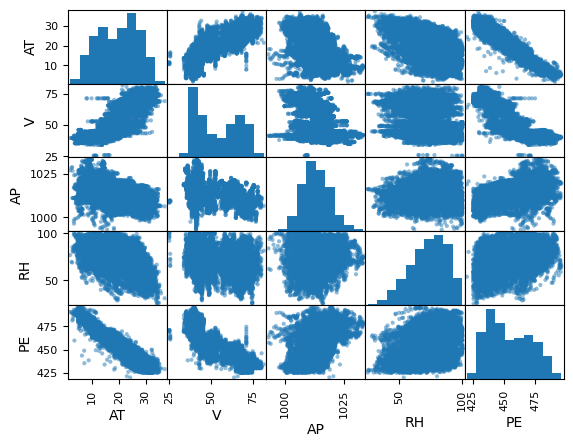

<Figure size 1500x1000 with 0 Axes>

In [17]:
#scatter
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.figure(figsize=(15,10))

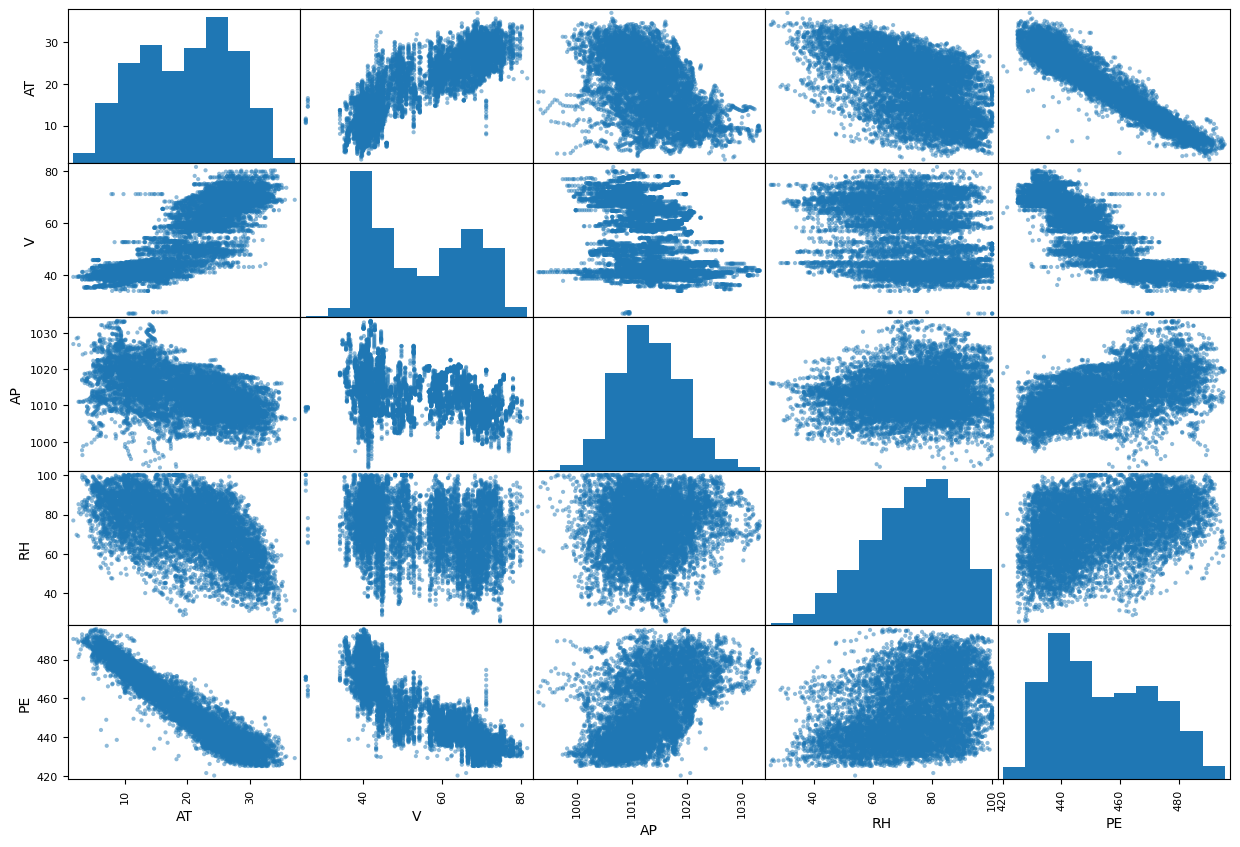

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(15, 10))

# Save the figure to the 'plots' folder
plt.savefig('plots/regression_1.png')
plt.show()


In [25]:
X=df.drop(['PE'],axis=1).values
Y=df['PE'].values #target variable

In [27]:
print(X)

[[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 ...
 [  15.99   43.34 1014.2    78.66]
 [  17.65   59.87 1018.58   94.65]
 [  23.68   51.3  1011.86   71.24]]


In [29]:
print(Y)

[480.48 445.75 438.76 ... 465.96 450.93 451.67]


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0) #splitting the data into training and testing

### TRAINING A LINEAR REGRESSION MODEL

In [35]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(X_train,Y_train)

LinearRegression()

In [37]:
y_pred=ml.predict(X_test) #making predictions
print(y_pred)

[433.33259502 448.37969342 445.91247797 ... 444.05809103 459.34745691
 472.91532015]


### EVALUATING MODEL PERFORMANCE USING R-SQUARED AND MEAN SQUARED ERROR

In [39]:
from sklearn.metrics import r2_score #calculating the r squared -score the performance of the model on test-data
r2_score(Y_test,y_pred)

0.9289374661293962

In [41]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print ("rmse",rmse)

rmse 4.539072735932721


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### VISUALIZING ACTUAL AND PREDICTED VALUES

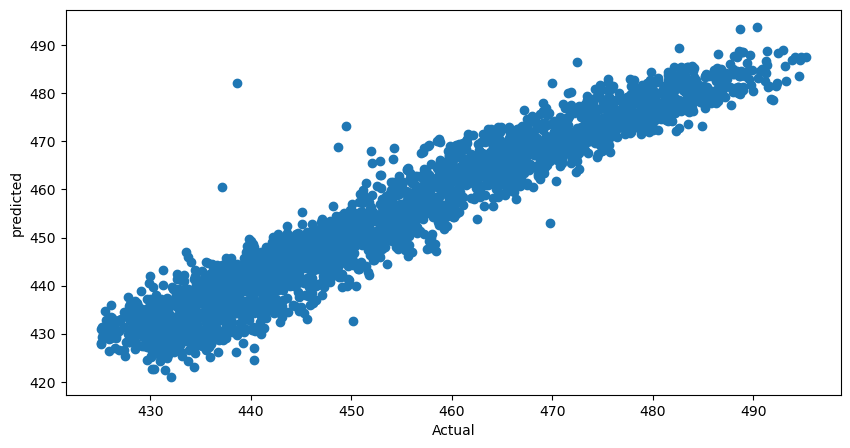

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(Y_test,y_pred) # scatterplot of actual and predicted values
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.savefig('plots/regression_2.png')


In [45]:

from sklearn.metrics import mean_squared_error

X = df.drop('PE', axis='columns')  # Drop the target variable 'PE' from the features
y = df['PE']  # Target variable

# 2. Optionally, create new features (e.g., squaring 'AT' or other transformations)
X['AT_squared'] = np.square(X['AT'])  # Squaring 'AT' (temperature)
X['V_squared'] = np.square(X['V'])    # Squaring 'V' (velocity)

# 3. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 4. Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Evaluate the model on the entire dataset (R-squared)
print('R squared on full dataset:', model.score(X, y))  # R-squared on the entire dataset

# 6. Make predictions on the test data
yhat = model.predict(X_test)

# 7. Calculate the RMSE (Root Mean Squared Error) on the test set
rmse = mean_squared_error(y_test, yhat, squared=False)  # squared=False gives RMSE
print('RMSE on test set:', rmse)


R squared on full dataset: 0.9357059157888363
RMSE on test set: 4.284909564391179


C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
